In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch

import numpy as np
import librosa
from glob import glob
import IPython.display as ipd
from matplotlib import pyplot as plt

In [3]:
from birds_utils import Dataset

In [14]:
std_stats = np.load('files_std_data_librosa.npy', allow_pickle=True).item()

In [5]:
DATA_FOLDER = '/home/usuario/birds/birdsong-recognition/train_audio/'

In [6]:
files = glob(DATA_FOLDER+'**/*', recursive=True)

In [9]:
files = [f for f in files if '.mp3' in f]

In [12]:
classes = np.load('./models/classes_264.npy')

In [116]:
def get_audio_chunk(filename, size, duration=5, sr=22050, bytes_per_sample=8, start=None, res_type='kaiser_fast'):
    chunk_samples = duration*sr
    
    if start is None:
        if chunk_samples == size:
            start = 0
        else:
            start = np.random.randint(size - chunk_samples)
    extention = filename.split('.')[-1]
    if extention == 'bin':
        f = open(filename, 'rb')
        f.seek(start*bytes_per_sample)
        audio_chunk = np.frombuffer(f.read(chunk_samples*bytes_per_sample))
        f.close()
    elif extention == 'mp3':
        offset=start/sr
        audio_chunk, sr = librosa.load(filename, sr, mono=True, offset=offset, duration=duration, res_type=res_type)
    else:
        print('extention not supported')
        return
    
    if len(audio_chunk) != chunk_samples:
        print(filename, start, chunk_samples, len(audio_chunk))
        return np.array([])
    return audio_chunk.copy()

In [117]:
std_stats['./dataset/bin_22050_librosa/rewbla/XC173883.mp3.bin']

{'std_max': 4.977633349200952,
 'std_mean': 0.5204739239983166,
 'std_min': 0.06745087074680106,
 'size': 2089811}

In [118]:
file_to_test_1 = './dataset/bin_22050_librosa/rewbla/XC173883.mp3.bin'
file_to_test_2 = '/home/usuario/birds/birdsong-recognition/train_audio/rewbla/XC173883.mp3'

In [119]:
std_stats[file_to_test_1]['size']/22050

94.77600907029479

In [138]:
%%time
audio_chunks = []
for i in range(50):
    audio_chunks.append(get_audio_chunk(file_to_test_2, std_stats[file_to_test_1]['size']))    

CPU times: user 3.53 s, sys: 4.02 s, total: 7.55 s
Wall time: 18.7 s


In [130]:
%%time
audio_chunks = []
for i in range(50):
    audio_chunks.append(get_audio_chunk(file_to_test_1, std_stats[file_to_test_1]['size']))

CPU times: user 27.5 ms, sys: 37.2 ms, total: 64.7 ms
Wall time: 115 ms


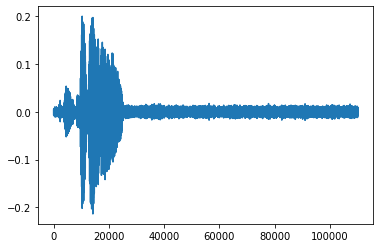

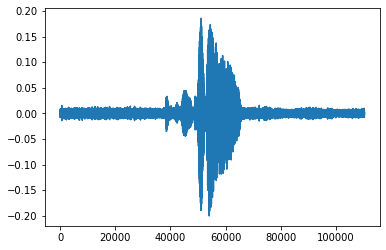

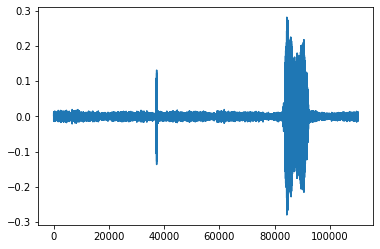

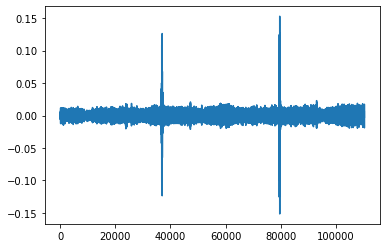

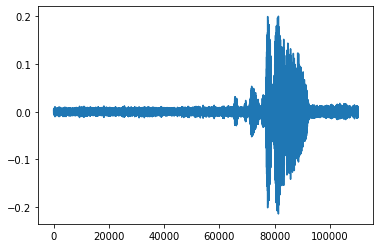

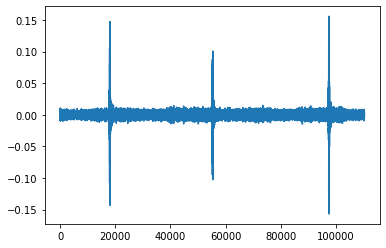

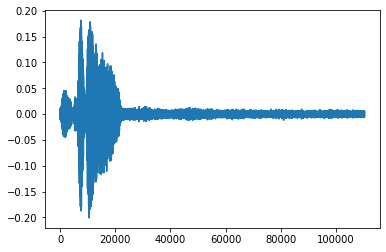

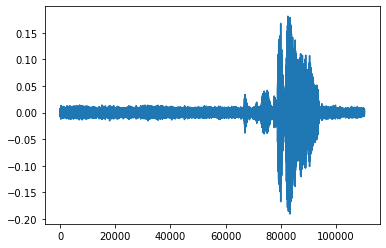

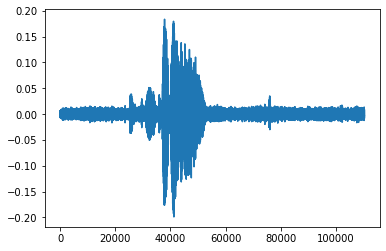

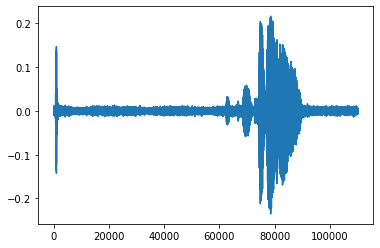

In [139]:
for i in range(10):
    plt.plot(audio_chunks[i])
    plt.show()

In [137]:
params_val = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 0,
              'timeout': 0
             }
N = 1


validation_set = Dataset(files, classes, std_stats, chunk_seconds=duration, sr=sr, min_std=min_std, multilabel=True, add_noise=False, add_ambient_noise=False, max_tries=0)
validation_generator = torch.utils.data.DataLoader(validation_set, **params_val)

NameError: name 'min_std' is not defined